In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('[Final]Total_csv.csv',sep='\t',encoding='utf-8')

In [3]:
df.columns.tolist()

['Post_id',
 'Title_len',
 'Count_space_mistake',
 'Map_exist',
 'Media_count',
 'Heart_count',
 'Sticker_count',
 'Comment_count',
 'Left',
 'Center',
 'Right',
 'Justify',
 'basic_font_check',
 'basic_font_size_check',
 'b_strong_word_len_ratio',
 'color_rgb_word_len_ratio',
 'First_ratio',
 'Second_ratio',
 'Text_len',
 'Img_count',
 'FR_url',
 'pos_ratio',
 'neg_ratio',
 'subjectivity',
 'polarity',
 'senti_diffs_per_ref',
 '가능하다',
 '가다',
 '간단하다',
 '갈다',
 '계시다',
 '궁금하다',
 '그렇다',
 '깔끔하다',
 '나가다',
 '나다',
 '나오다',
 '남다',
 '내다',
 '너무',
 '넘다',
 '넣다',
 '높다',
 '느끼다',
 '늘다',
 '다니다',
 '다르다',
 '다양하다',
 '덥다',
 '돼다',
 '되다',
 '되어다',
 '두다',
 '드리다',
 '들다',
 '들어가다',
 '들이다',
 '따르다',
 '만나다',
 '만들다',
 '많다',
 '많이',
 '말다',
 '맛있다',
 '맞다',
 '먹다',
 '모르다',
 '믿다',
 '바라다',
 '받다',
 '버리다',
 '보내다',
 '보다',
 '보이다',
 '빠르다',
 '빠지다',
 '새롭다',
 '생기다',
 '서다',
 '쉬다',
 '시원하다',
 '싶다',
 '쓰다',
 '아니다',
 '아직',
 '안녕하다',
 '안되다',
 '않다',
 '알다',
 '알아보다',
 '어떻다',
 '어렵다',
 '없다',
 '없이',
 '예쁘다',
 '오다',
 '올리다',
 '원하다',
 '유명하다',
 '이렇게',


In [4]:
drop_column_list = ['Post_id', 'Blog_mobile_profile_img', 'Blog_mobile_cover_img']

In [5]:
new_df = df.drop(drop_column_list,axis=1)

# Heart_count
# Comment_count

In [6]:
new_df['Heart_count'] = new_df['Heart_count'].apply(lambda x : 0 if x =='hide' else x)
new_df['Comment_count'] = new_df['Comment_count'].apply(lambda x : 0 if x =='hide' else x)

In [7]:
Analysis_df = new_df.fillna(0)

In [8]:
Analysis_df.to_csv('[Final]Analysis_df.csv',sep='\t',encoding='utf-8',index=False)

In [9]:
column_list = Analysis_df.columns.tolist()

In [10]:
Analysis_df.groupby(by='Credibility')['Heart_count'].count()

Credibility
0    6362
1    9942
Name: Heart_count, dtype: int64

## Data 개수 맞춰주기

In [11]:
# naver_df = Analysis_df[Analysis_df['Credibility']==1]
# dbdbdeep_df = Analysis_df[Analysis_df['Credibility']==0]

# from sklearn.utils import shuffle
# naver_df = shuffle(naver_df)
# naver_df.shape

# naver_df = naver_df.iloc[:6362]

# dbdbdeep_df.shape

# Analysis_df = pd.concat([naver_df,dbdbdeep_df])

# Data shuffle

In [12]:
from sklearn.utils import shuffle
Analysis_df = shuffle(Analysis_df)

In [13]:
x = Analysis_df.drop(columns='Credibility',axis=1)
y = Analysis_df[['Credibility']]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_scaled = pd.DataFrame(scaler.transform(x),columns = x.columns)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size=0.33, random_state=42)

# Random Foreset

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
print("RF :",accuracy_score(clf.predict(x_test),y_test))

RF : 0.9401598215944992


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92      2071
          1       0.92      0.98      0.95      3310

avg / total       0.94      0.94      0.94      5381



In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_scaled, y, cv=5)
scores   

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn

array([0.93010423, 0.92550582, 0.93312883, 0.93803681, 0.94079755])

In [35]:
Feautre_list = new_df.columns.tolist()[:-1]

Feature ranking:
1. feature Heart_count (0.380495)
2. feature Opening_date (0.157142)
3. feature Count_visitors (0.111530)
4. feature Count_categories (0.090060)
5. feature img text img text img (0.071112)
6. feature experience (0.051894)
7. feature FR_url (0.028911)
8. feature 많다 (0.024927)
9. feature 보다 (0.020119)
10. feature Count_neighbors (0.013171)
11. feature Blog_info_text_len (0.013016)
12. feature 자세하다 (0.012622)
13. feature Text_similarity (0.012386)
14. feature text img text img text (0.004352)
15. feature 저렴하다 (0.004099)
16. feature 들다 (0.002644)
17. feature 해보다 (0.000787)
18. feature 결혼준비 (0.000500)
19. feature First_ratio (0.000234)
20. feature 보이다 (0.000000)
21. feature 버리다 (0.000000)
22. feature 없다 (0.000000)
23. feature 어렵다 (0.000000)
24. feature 어떻다 (0.000000)
25. feature 알아보다 (0.000000)
26. feature 알다 (0.000000)
27. feature 않다 (0.000000)
28. feature 안되다 (0.000000)
29. feature 받다 (0.000000)
30. feature 안녕하다 (0.000000)
31. feature 아직 (0.000000)
32. feature 아니다 (0.0000

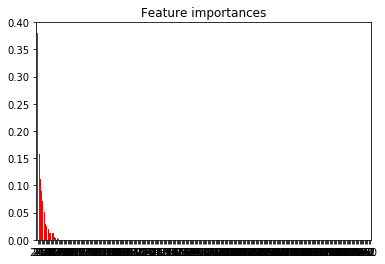

In [37]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, Feautre_list[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Logistic Regression

In [27]:
from  sklearn  import  linear_model
logreg = linear_model.LogisticRegression(C=2.0,random_state=42,solver='sag',multi_class='multinomial',warm_start=True)
logreg.fit(x_train, y_train)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=True)

In [28]:
print("RF :",accuracy_score(logreg.predict(x_test),y_test))

RF : 0.9682215201635384


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96      2071
          1       0.97      0.98      0.97      3310

avg / total       0.97      0.97      0.97      5381



In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_scaled, y, cv=5)
scores         

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did n

array([0.96965052, 0.96566524, 0.97116564, 0.97208589, 0.96472393])

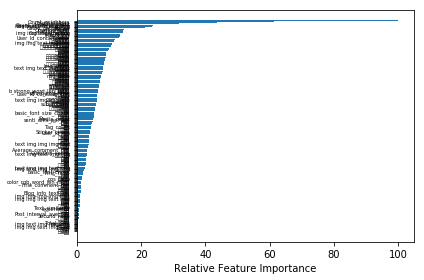

In [31]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x_train.columns)[sorted_idx], fontsize=5)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [111]:
list(reversed(sorted(x.items(), key =lambda x:x[1])))

[(2, 100.0),
 (125, 61.3744385740602),
 (237, 43.51123748231237),
 (214, 31.820344201317454),
 (250, 26.33476881646008),
 (130, 25.36644459840521),
 (35, 23.77286999975595),
 (132, 23.26726026558944),
 (107, 21.140387775763852),
 (1, 16.0341503667372),
 (189, 15.033321488944088),
 (4, 14.727622400586803),
 (213, 14.474282158797887),
 (129, 14.339348173428256),
 (56, 14.235856159380361),
 (95, 13.804185396887595),
 (147, 13.78083176428616),
 (210, 13.473432204530756),
 (246, 13.447818016104785),
 (19, 13.391340246448438),
 (57, 13.002661720738276),
 (139, 12.631369912445312),
 (148, 12.315680921479204),
 (149, 11.951155812743787),
 (103, 11.635180089649795),
 (150, 11.576083877305608),
 (61, 11.098914720069834),
 (108, 11.073975747398222),
 (208, 10.915123779009148),
 (106, 10.7698817538312),
 (222, 10.690042538508477),
 (224, 10.570652731270075),
 (74, 10.439742925782648),
 (235, 10.025016005683456),
 (52, 10.005689170754815),
 (100, 9.982238093108126),
 (122, 9.730261867253667),
 (184

In [120]:
feature_dict = dict(zip(sorted_idx,feature_importance))
ranking_list = reversed(sorted(feature_dict.items(), key =lambda feature_dict:feature_dict[1]))
print('Feature ranking:')
for num,feature in enumerate(ranking_list):
    print ('feature : %d %s (%f)' % (num+1,Feautre_list[feature[0]],feature[1]))

Feature ranking:
feature : 1 Map_exist (100.000000)
feature : 2 img img img img img (61.374439)
feature : 3 학문 (43.511237)
feature : 4 장기렌트 (31.820344)
feature : 5 Count_categories (26.334769)
feature : 6 img text img img img (25.366445)
feature : 7 나오다 (23.772870)
feature : 8 img text img text img (23.267260)
feature : 9 적다 (21.140388)
feature : 10 Count_space_mistake (16.034150)
feature : 11 아이폰수리 (15.033321)
feature : 12 Heart_count (14.727622)
feature : 13 자동차리스 (14.474282)
feature : 14 img img text img text (14.339348)
feature : 15 따르다 (14.235856)
feature : 16 올리다 (13.804185)
feature : 17 국내여행 (13.780832)
feature : 18 입꼬리수술잘하는곳 (13.473432)
feature : 19 User_Id_len (13.447818)
feature : 20 FR_url (13.391340)
feature : 21 만나다 (13.002662)
feature : 22 it (12.631370)
feature : 23 귀성형수술 (12.315681)
feature : 24 김앤방여성의원 (11.951156)
feature : 25 자세하다 (11.635180)
feature : 26 누운귀성형 (11.576084)
feature : 27 말다 (11.098915)
feature : 28 좋다 (11.073976)
feature : 29 입꼬리수술 (10.915124)
feature :

# OLS Regression Results

In [33]:
import statsmodels.api as sm
x_2 = sm.add_constant(x)
est = sm.OLS(y,x_2.astype(float)).fit()

In [34]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            Credibility   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 12 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:35:36   Log-Likelihood:                -635.65
No. Observations:               16304   AIC:                             1781.
Df Residuals:                   16049   BIC:                             3745.
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   